In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [361]:
#Data uploading
titanic = pd.read_csv('titanic-passengers.csv',sep=';')

#Nuber of columns and rows
titanic.shape

(891, 12)

In [316]:
#information about columns
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#Informations about numerical variables
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [364]:
#Checking of preprocessing success
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [363]:
#Replacement of missing values
titanic['Cabin'].fillna('G6',inplace = True)
titanic['Embarked'].fillna('S',inplace = True)
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

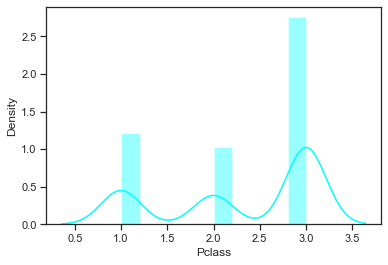

In [337]:
#Data visualization

#Distribution of passenger class feature
sns.distplot(titanic['Pclass'], bins=10, hist=True, kde=True, color='cyan')

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

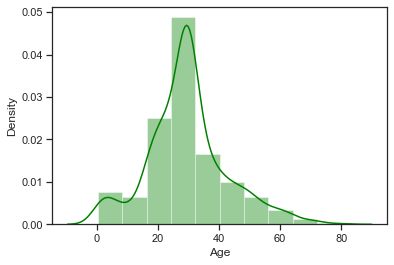

In [113]:
#Distribution of Age features
sns.distplot(titanic['Age'], bins=10, hist=True, kde=True, color='green')

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

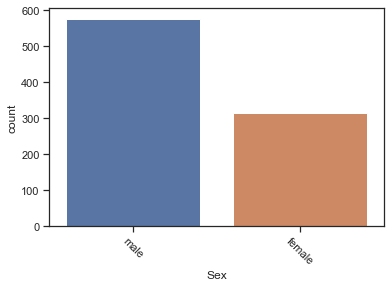

In [338]:
#Distribution of Sex features
sns.countplot(x='Sex', data = titanic)
plt.xticks(rotation = -45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

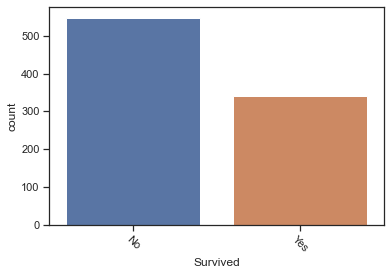

In [111]:
#Distribution of Survived features
sns.countplot(x='Survived', data = titanic)
plt.xticks(rotation = -45)

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


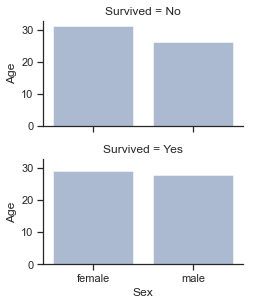

In [339]:
#Correlation between sex and age with survival as the target
grid = sns.FacetGrid(titanic, row = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Age', alpha = .5, ci = None)
grid.add_legend()

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


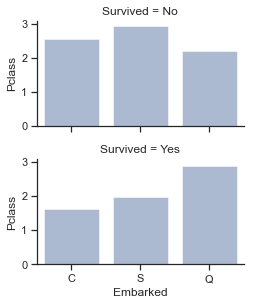

In [340]:
#Correlation between Embarked and Pclass with survival as the target
grid = sns.FacetGrid(titanic, row = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Embarked', 'Pclass', alpha = .5, ci = None)
grid.add_legend()

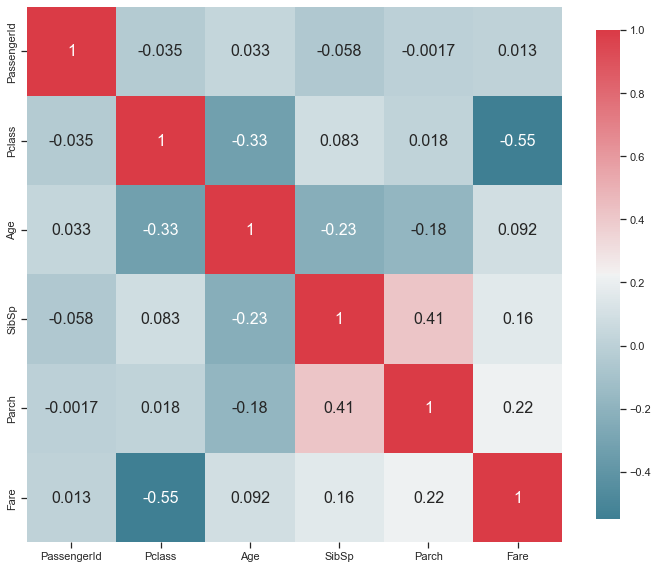

In [341]:
def plot_correlation_map( df ):

    #Get the correlation of datta features
    corr = df.corr()
    
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    
    #The mapping from data values to color space
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,
        
        #Square shape each cell
        square=True, 
        
        
        cbar_kws={ 'shrink' : .9 }, 
        
        #Specification of axis in which the plot will be drawn
        ax=ax, 
        
        #Write the datas of correlation in the cells
        annot = True, 
        
        #Size of datas of correlation setting
        annot_kws = { 'fontsize' : 16 }

        )

plot_correlation_map(titanic)

# Analysis

#### The plot_correlation_map() function is expected to draw a 2D matrix of the correlation between the titanic variables. The fluctuation goes from -0.55 to 1 which is the highest correlation (i.e the correlation the same variable). The fluctuation of colours follows the correlation one. This practice provide a colored visual summary of the titanic dataset. The colorbar helps to handle the relationship between the colours and values.

In [342]:
#The relation between Pclass and Survived
cleanup = {"Survived":{"Yes":1,"No":0}}
titanic.replace(cleanup, inplace = True)
titanic[["Pclass","Survived"]].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [145]:
titanic = titanic.drop(["Name"], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [372]:
title_2,title = [],[]

title_1 = titanic["Name"]
title_1 = [element.split(',') for element in title_1]

for i in range(0,len(title_1)) :
    title_2.append(title_1[i][1].split('.'))
    

for i in range(0,len(title_2)) :
    title.append(title_2[i][0])


titanic['Title'] = pd.Series(title)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,Mrs,1
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,Mr,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,Miss,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,Mr,0


C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


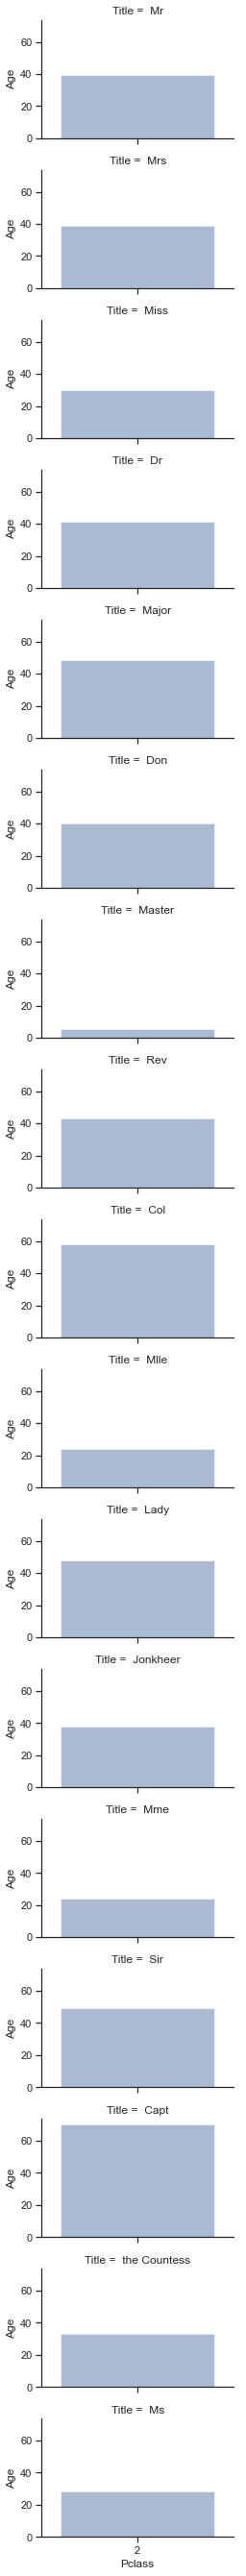

In [371]:
#Correlation between sex and age with title as the target
grid = sns.FacetGrid(titanic, row = 'Title', height = 2.2, aspect = 1.6)
grid.map(sns.barplot,'Pclass', 'Age', alpha = .5, ci = None)
grid.add_legend()

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


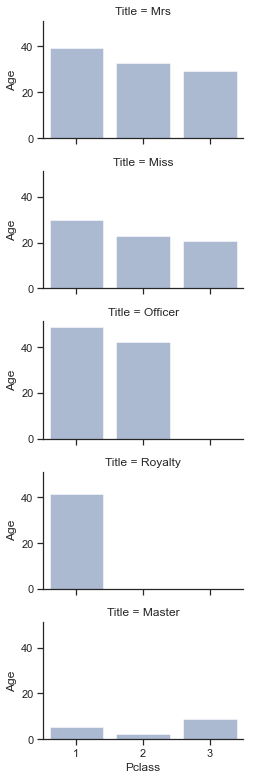

In [367]:
Title_Dictionary = {
                    "Title" : {

                                " Capt":       "Officer",

                                " Col":        "Officer",

                                " Major":      "Officer",

                                " Dr":         "Officer",

                                " Rev":        "Officer",

                                " Jonkheer":   "Royalty",

                                " Don":        "Royalty",

                                " Sir" :       "Royalty",

                                " Lady" :      "Royalty",

                                " the Countess": "Royalty",

                                " Dona":       "Royalty",

                                " Mme":        "Miss",
    
                                " Mlle":       "Miss",

                                " Miss" :      "Miss",
 
                                " Ms":         "Mrs",

                                " Mr" :        "Mrs",

                                " Mrs" :       "Mrs",

                                " Master" :    "Master"

                            }
                        }

titanic.replace(Title_Dictionary,inplace = True)
grid = sns.FacetGrid(titanic, row = 'Title', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Pclass', 'Age', alpha = .5, ci = None)
grid.add_legend()

In [374]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

C:\Users\pc-hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FamilySize', ylabel='Density'>

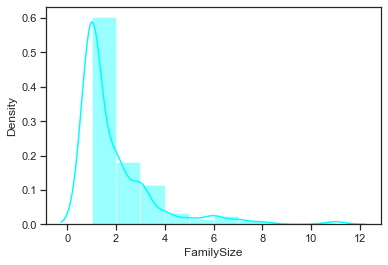

In [378]:
sns.distplot(titanic['FamilySize'], bins=10, hist=True, kde=True, color='cyan')

In [379]:
#The relation between FamilySize and Survived
cleanup = {"Survived":{"Yes":1,"No":0}}
titanic.replace(cleanup, inplace = True)
titanic[["FamilySize","Survived"]].groupby(['FamilySize'], as_index=True).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000
